In [14]:
pip install mne scipy numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 40.5 MB/s eta 0:00:00


In [15]:
import pandas as pd
import numpy as np

In [16]:
import scipy.io as sio

In [17]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
cd /content/drive/MyDrive/BCSSDD

/content/drive/MyDrive/BCSSDD


In [19]:
ls

mat2mne.mat     MNE_NB_3.ipynb  oddball_epo.fif               Week2_Mini_project_Ayush_Kumar.ipynb
MNE_NB_1.ipynb  NB1.ipynb       oddball_example_small-fif.gz
MNE_NB_2.ipynb  NB2.ipynb       oddball_long_epo.fif


In [20]:
data = sio.loadmat("/content/drive/MyDrive/BCSSDD/mat2mne.mat")

In [21]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'cnt', 'nfo'])

In [22]:
data['nfo']

array([[(array([[100]], dtype=uint8), array([[array(['left'], dtype='<U4'), array(['foot'], dtype='<U4')]],
              dtype=object), array([[array(['AF3'], dtype='<U3'), array(['AF4'], dtype='<U3'),
                array(['F5'], dtype='<U2'), array(['F3'], dtype='<U2'),
                array(['F1'], dtype='<U2'), array(['Fz'], dtype='<U2'),
                array(['F2'], dtype='<U2'), array(['F4'], dtype='<U2'),
                array(['F6'], dtype='<U2'), array(['FC5'], dtype='<U3'),
                array(['FC3'], dtype='<U3'), array(['FC1'], dtype='<U3'),
                array(['FCz'], dtype='<U3'), array(['FC2'], dtype='<U3'),
                array(['FC4'], dtype='<U3'), array(['FC6'], dtype='<U3'),
                array(['CFC7'], dtype='<U4'), array(['CFC5'], dtype='<U4'),
                array(['CFC3'], dtype='<U4'), array(['CFC1'], dtype='<U4'),
                array(['CFC2'], dtype='<U4'), array(['CFC4'], dtype='<U4'),
                array(['CFC6'], dtype='<U4'), array(['CFC8

In [23]:
eeg_data = data['cnt']
eeg_data

array([[  -3,   -3,   -3, ...,    2,    7,    5],
       [ -25,  -21,  -26, ...,   19,   60,   45],
       [ -34,  -15,  -52, ...,   37,  130,   98],
       ...,
       [2524, 2672, 2347, ..., 1167, 1620, 1205],
       [2561, 2706, 2385, ..., 1249, 1693, 1210],
       [2606, 2759, 2457, ..., 1366, 1838, 1263]], dtype=int16)

In [24]:
eeg_data = eeg_data.T

In [25]:
n_channels ,n_samples= eeg_data.shape
sfreq=data['nfo']['fs'][0][0][0][0] #100
#n_time_samples = eeg_data.shape[1]
#n_time_samples

In [26]:
import mne
channel_names=[s[0] for s in data['nfo']['clab'][0][0][0]]
event_onsets=data['mrk'][0][0][0]
event_codes=data['mrk'][0][0][1]
labels=np.zeros((1,n_samples),int)
labels[0,event_onsets]=event_codes




In [51]:
cl_lab=[s[0] for s in data['nfo']['classes'][0][0][0]]
cl1=cl_lab[0]
cl2=cl_lab[1]


In [28]:
xpos=data['nfo']['xpos']
ypos=data['nfo']['ypos']

nclasses=len(cl_lab)
nevents=len(event_onsets)
nchannels=len(channel_names)

In [29]:
trials={}
seg_time=np.arange(int(0.5*sfreq),int(2.5*sfreq)) #segmentation of the data
nsamples=len(seg_time)
seg_time.shape

(200,)

In [30]:
for cl, code in zip(cl_lab,np.unique(event_codes)):

  cl_onsets=event_onsets[event_codes == code]

  trials[cl]=np.zeros((nchannels,nsamples,len(cl_onsets)))

  for i,onset in enumerate(cl_onsets):

    trials[cl][:,:,i]=eeg_data[:,seg_time+onset]


In [31]:
%qtconsole

In [32]:
left_hand=np.rollaxis(trials[cl1],2,0)
right_hand=np.rollaxis(trials[cl2],2,0)
left_hand

array([[[ 885.,  909.,  918., ...,  916.,  922.,  939.],
        [ 674.,  732.,  708., ...,  636.,  638.,  610.],
        [1312., 1303., 1334., ..., 1207., 1240., 1259.],
        ...,
        [1016.,  987.,  971., ...,  688.,  764.,  770.],
        [1312., 1224., 1188., ...,  898.,  998., 1090.],
        [ 787.,  789.,  794., ...,  458.,  597.,  631.]],

       [[ 799.,  839.,  852., ...,  880.,  903.,  933.],
        [ 279.,  352.,  415., ...,  388.,  436.,  468.],
        [1153., 1175., 1178., ..., 1257., 1279., 1296.],
        ...,
        [ 676.,  697.,  759., ...,  701.,  739.,  821.],
        [ 957.,  964., 1061., ..., 1086., 1122., 1129.],
        [ 478.,  475.,  576., ...,  539.,  588.,  652.]],

       [[ 896.,  885.,  865., ...,  940.,  960., 1008.],
        [ 359.,  355.,  359., ...,  266.,  294.,  313.],
        [1288., 1240., 1197., ..., 1185., 1191., 1236.],
        ...,
        [ 873.,  806.,  681., ...,  694.,  629.,  573.],
        [1211., 1151., 1032., ..., 1061.,  94

In [33]:
print(left_hand.shape)
new_data=np.concatenate([left_hand,right_hand])
Y=np.concatenate([-np.zeros(left_hand.shape[0]),np.ones(right_hand.shape[0])])
Y[Y == 0] = -1
Y

(100, 59, 200)


array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [34]:
#Creating MNE Structure
n_channels=59
info = mne.create_info(ch_names=channel_names,sfreq=sfreq,ch_types=['eeg']*n_channels)
#info.set_montage('standard_1020')
print('Event created :', info)

Event created : <Info | 7 non-empty values
 bads: []
 ch_names: AF3, AF4, F5, F3, F1, Fz, F2, F4, F6, FC5, FC3, FC1, FCz, FC2, ...
 chs: 59 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 59
 projs: []
 sfreq: 100.0 Hz
>


In [35]:
xpos=data['nfo']['xpos'][0][0]
ypos=data['nfo']['ypos'][0][0]

In [36]:
layout_pos=np.concatenate([xpos,ypos],axis=1)
layout_pos

array([[-0.20109028,  0.68656518],
       [ 0.20109028,  0.68656518],
       [-0.48547489,  0.52547424],
       [-0.32894737,  0.46520183],
       [-0.16535231,  0.43208641],
       [ 0.        ,  0.421549  ],
       [ 0.16535231,  0.43208641],
       [ 0.32894737,  0.46520183],
       [ 0.48547489,  0.52547424],
       [-0.60591541,  0.27165704],
       [-0.39919579,  0.23384348],
       [-0.19765935,  0.21394494],
       [ 0.        ,  0.20773757],
       [ 0.19765935,  0.21394494],
       [ 0.39919579,  0.23384348],
       [ 0.60591541,  0.27165704],
       [-0.74834683,  0.15177169],
       [-0.52472976,  0.12553103],
       [-0.30963911,  0.11086096],
       [-0.10226303,  0.10426648],
       [ 0.10226303,  0.10426648],
       [ 0.30963911,  0.11086096],
       [ 0.52472976,  0.12553103],
       [ 0.74834683,  0.15177169],
       [-0.87719298,  0.        ],
       [-0.64569058,  0.        ],
       [-0.421549  ,  0.        ],
       [-0.20773757,  0.        ],
       [ 0.        ,

In [37]:
layout=mne.channels.generate_2d_layout(
    xy=layout_pos,
    ch_names=channel_names,

    name='EEG CUSTOM LAYOUT',
)

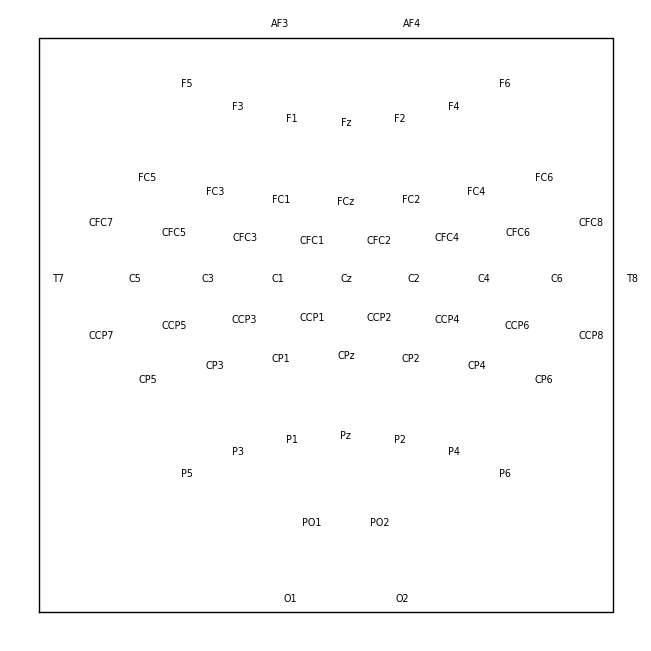

In [38]:
layout.plot();

In [39]:
#MNE EVENTS
event_id = dict(left=-1,right=1)
eventlength=Y.shape[0]
ev=[i*sfreq*3 for i in range(eventlength)]
events=np.column_stack((np.array(ev,dtype=int),
np.zeros(eventlength,dtype=int),
np.array(Y,dtype=int)))


events


array([[    0,     0,    -1],
       [  300,     0,    -1],
       [  600,     0,    -1],
       [  900,     0,    -1],
       [ 1200,     0,    -1],
       [ 1500,     0,    -1],
       [ 1800,     0,    -1],
       [ 2100,     0,    -1],
       [ 2400,     0,    -1],
       [ 2700,     0,    -1],
       [ 3000,     0,    -1],
       [ 3300,     0,    -1],
       [ 3600,     0,    -1],
       [ 3900,     0,    -1],
       [ 4200,     0,    -1],
       [ 4500,     0,    -1],
       [ 4800,     0,    -1],
       [ 5100,     0,    -1],
       [ 5400,     0,    -1],
       [ 5700,     0,    -1],
       [ 6000,     0,    -1],
       [ 6300,     0,    -1],
       [ 6600,     0,    -1],
       [ 6900,     0,    -1],
       [ 7200,     0,    -1],
       [ 7500,     0,    -1],
       [ 7800,     0,    -1],
       [ 8100,     0,    -1],
       [ 8400,     0,    -1],
       [ 8700,     0,    -1],
       [ 9000,     0,    -1],
       [ 9300,     0,    -1],
       [ 9600,     0,    -1],
       [ 9

In [40]:
tmin=0.5
event_id = dict(left=-1,right=1)
epochs=mne.EpochsArray(new_data,info,events,tmin,event_id)

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated


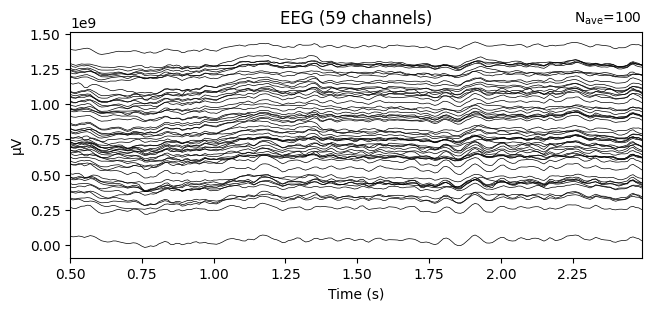

In [41]:
epochs['left'].average().plot();

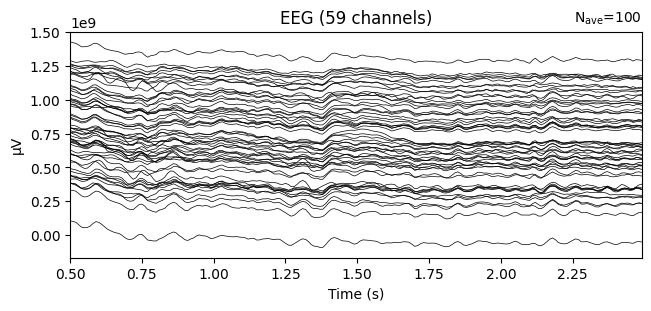

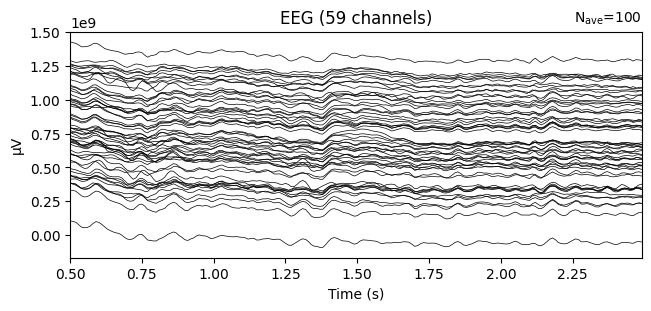

In [42]:
epochs['right'].average().plot()



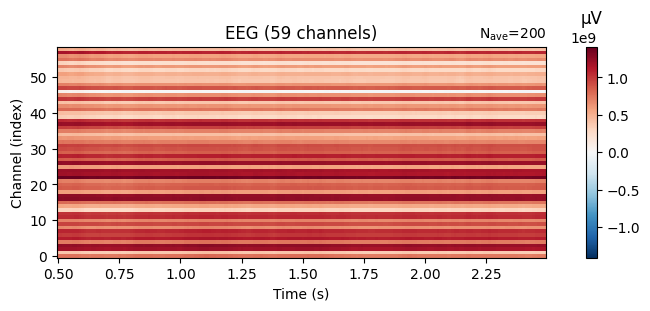

In [43]:
epochs.average().plot_image();

In [44]:
raw = mne.io.RawArray(eeg_data, info)

Creating RawArray with float64 data, n_channels=59, n_times=190594
    Range : 0 ... 190593 =      0.000 ...  1905.930 secs
Ready.


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...


<ipython-input-45-dbdc09158686>:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  epochs.plot_psd();
<ipython-input-45-dbdc09158686>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.plot_psd();


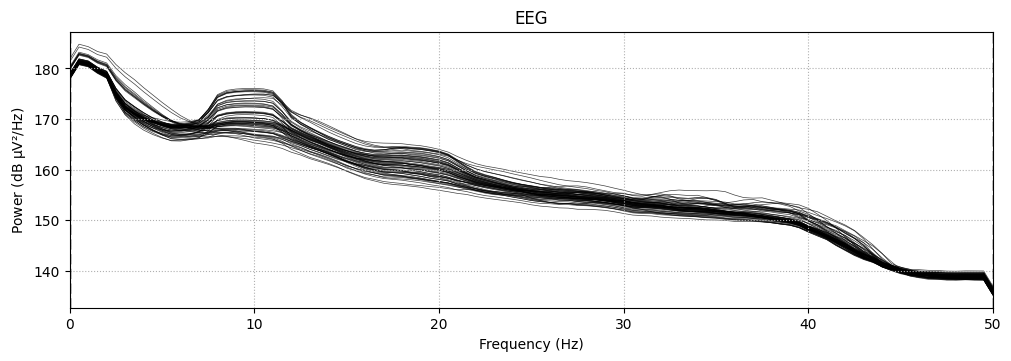

In [45]:
epochs.plot_psd();

In [46]:
target_r=epochs['right'].average()
target_l=epochs['left'].average()

In [47]:
target_r.plot_topomap();

RuntimeError: No digitization points found.

In [52]:
epochs.filter(1, 30, method='iir')

Setting up band-pass filter from 1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB



Number of events,200
Events,left: 100right: 100
Time range,0.500 – 2.490 s
Baseline,off


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...


<ipython-input-53-dbdc09158686>:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  epochs.plot_psd();
<ipython-input-53-dbdc09158686>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.plot_psd();


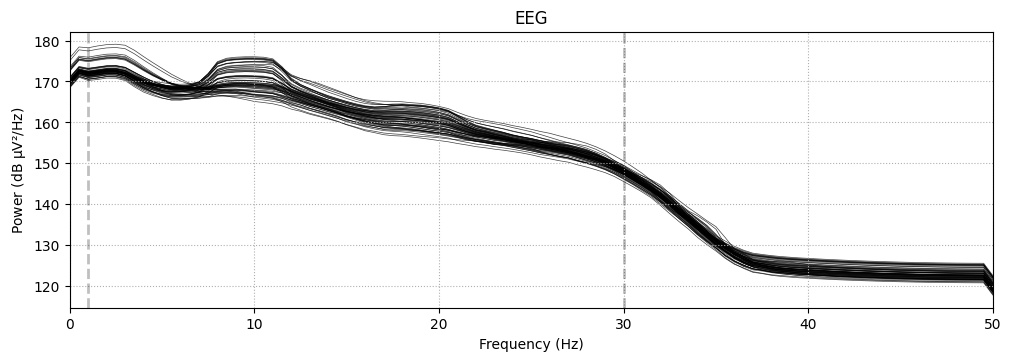

In [53]:
epochs.plot_psd();